In [30]:
!pip install -q tfds-nightly tensorflow matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [31]:
#tfds.list_builders()
builder = tfds.builder('pneumonia_mnist')
# 1. Create the tfrecord files (no-op if already exists)
builder.download_and_prepare()
# 2. Load the `tf.data.Dataset`
ds = builder.as_dataset(split='train', shuffle_files=True)
print(ds)

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [32]:
images = ds.take(1)
for example in images:
  print(example)



{'image': <tf.Tensor: shape=(28, 28, 1), dtype=uint8, numpy=
array([[[141],
        [139],
        [123],
        [109],
        [110],
        [115],
        [129],
        [151],
        [172],
        [186],
        [207],
        [222],
        [226],
        [223],
        [223],
        [226],
        [227],
        [233],
        [222],
        [202],
        [183],
        [162],
        [150],
        [155],
        [127],
        [130],
        [135],
        [141]],

       [[126],
        [132],
        [125],
        [118],
        [120],
        [122],
        [131],
        [149],
        [163],
        [175],
        [195],
        [211],
        [216],
        [214],
        [215],
        [218],
        [221],
        [224],
        [210],
        [185],
        [164],
        [140],
        [126],
        [130],
        [136],
        [133],
        [132],
        [135]],

       [[128],
        [131],
        [123],
        [120],
        [127],
        [126],
     

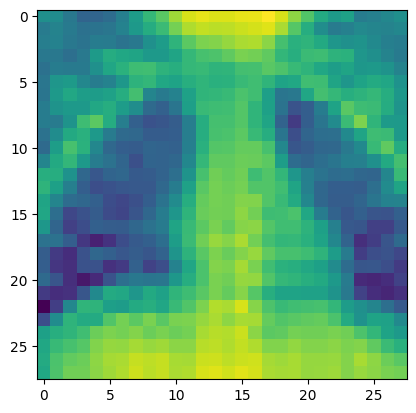

In [33]:
example = example["image"].numpy()
plt.imshow(example)


In [34]:
# Load as dictionary
ds = tfds.load('pneumonia_mnist', split='train', as_supervised=True)
ds = ds.take(10)

for image, label in ds:  # example is (image, label)
  print(image.shape, label)

(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(0, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)
(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)


In [36]:
# Load as dataframe
ds, info = tfds.load('pneumonia_mnist', split='train', with_info=True)

tfds.as_dataframe(ds.take(4), info)

,image,label
0,,0 (Normal)
1,,1 (Pneumonia)
2,,0 (Normal)
3,,1 (Pneumonia)


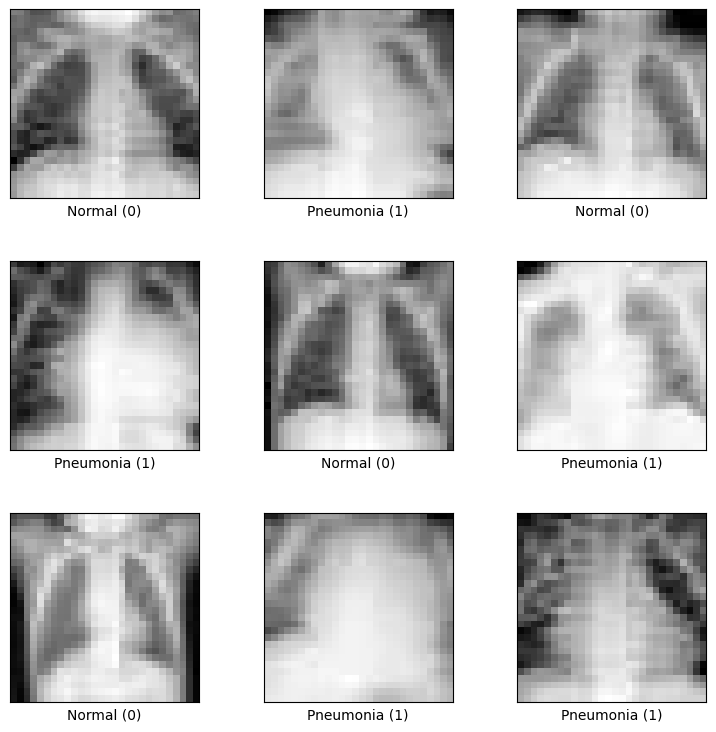

In [37]:
# Show examples
fig = tfds.show_examples(ds, info)

In [38]:
# Load dataset with access to the metadata
ds, info = tfds.load('pneumonia_mnist', with_info=True)
builder = tfds.builder('pneumonia_mnist')
info = builder.info
print(info)

tfds.core.DatasetInfo(
    name='pneumonia_mnist',
    full_name='pneumonia_mnist/1.0.0',
    description="""
    # MedMNIST Pneumonia Dataset
    
    The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray
    images. The task is binary-class classification of pneumonia against normal. The
    source training set is split with a ratio of 9:1 into training and validation
    set, and use its source validation set as the test set. The source images are
    gray-scale, and their sizes are (384–2,916) × (127–2,713). The images are
    center-cropped with a window size of length of the short edge and resized into 1
    × 28 × 28.
    """,
    homepage='https://medmnist.com//',
    data_dir='/root/tensorflow_datasets/pneumonia_mnist/1.0.0',
    file_format=tfrecord,
    download_size=3.98 MiB,
    dataset_size=3.66 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),

In [39]:
# Load training set as dataframe
ds_train, info_train = tfds.load('pneumonia_mnist', split='train', with_info=True)

tfds.as_dataframe(ds_train.take(5), info_train)
len(ds_train)
for example in ds_train:
  print(example)

Output streaming troncato alle ultime 5000 righe.
        [183],
        [169],
        [163],
        [160],
        [151],
        [146],
        [137],
        [120],
        [102],
        [ 88],
        [ 77],
        [ 76]],

       [[103],
        [113],
        [126],
        [138],
        [143],
        [143],
        [141],
        [140],
        [145],
        [148],
        [156],
        [166],
        [177],
        [185],
        [188],
        [189],
        [185],
        [172],
        [156],
        [148],
        [146],
        [140],
        [127],
        [115],
        [ 85],
        [ 79],
        [ 78],
        [ 85]],

       [[131],
        [137],
        [145],
        [151],
        [153],
        [152],
        [152],
        [151],
        [154],
        [157],
        [163],
        [171],
        [180],
        [186],
        [188],
        [188],
        [190],
        [180],
        [167],
        [159],
        [157],
        [152],
        [142],
 

In [40]:
# Load test set as dataframe
ds_test, info_test = tfds.load('pneumonia_mnist', split='test', with_info=True)

tfds.as_dataframe(ds_test.take(5), info_test)
len(ds_test)
for exapmle in ds_test:
  print(example)


Output streaming troncato alle ultime 5000 righe.
        [183],
        [180],
        [177],
        [177],
        [176],
        [172],
        [165],
        [159],
        [146],
        [115],
        [ 80],
        [ 66]],

       [[151],
        [162],
        [171],
        [174],
        [176],
        [179],
        [181],
        [179],
        [182],
        [182],
        [183],
        [186],
        [189],
        [190],
        [189],
        [187],
        [177],
        [177],
        [177],
        [176],
        [174],
        [170],
        [166],
        [164],
        [144],
        [132],
        [119],
        [114]],

       [[155],
        [165],
        [174],
        [177],
        [178],
        [181],
        [182],
        [181],
        [182],
        [182],
        [183],
        [186],
        [189],
        [190],
        [188],
        [186],
        [179],
        [179],
        [177],
        [174],
        [171],
        [167],
        [164],
 